In [131]:
import networkx as nx
import cenpy
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
##from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily

Red: https://deepnote.com/@siew-sook-yan/Python-Retrieving-OpenStreetMap-data-with-OSMNX-NIFhR_zARQm2jYqcctP5hg

In [12]:
pioneer_valley = ['Hampshire County, Massachusetts, USA', 'Hampden County, Massachusetts, USA', 'Leverett, Massachusetts, USA','Sunderland, Massachusetts, USA', 'Whately, Massachusetts, USA']#, 'Franklin County, Massachusetts, USA']
          #{'city':'Los Altos Hills', 'state':'California'},
          #'Loyola, California']
graph = ox.graph_from_place(pioneer_valley, network_type='drive')
area = ox.geocode_to_gdf(pioneer_valley)

In [13]:
print(type(graph))
print(type(area))

<class 'networkx.classes.multidigraph.MultiDiGraph'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [14]:
bstops = ox.geometries_from_place(pioneer_valley, tags={'highway':'bus_stop','amenity':'bus_station'})

In [136]:
bstops.network.unique()

array(['PVTA', 'FRTA', nan, 'Pioneer Valley Transit Authority', 'MART',
       'PVTA 33'], dtype=object)

In [16]:
# Retrieve nodes and edges
intxns, streets = ox.graph_to_gdfs(graph)

In [102]:
bus_network_extent = bstops.unary_union.envelope
b = bstops.total_bounds

/home/jbo/.local/lib/python3.10/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/home/jbo/.local/lib/python3.10/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/jbo/.local/lib/python3.10/site-packages/geopandas/plotting.py:74: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if mpl >= LooseVersion("3.4") or (mpl > LooseVersion("3.3.2") and "+" in mpl):
/home/jbo/.local/lib/python3.10/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/home/jbo/.local/lib/python3.10/site-packages/geopandas/plotting.py:74: DeprecationWarning: di

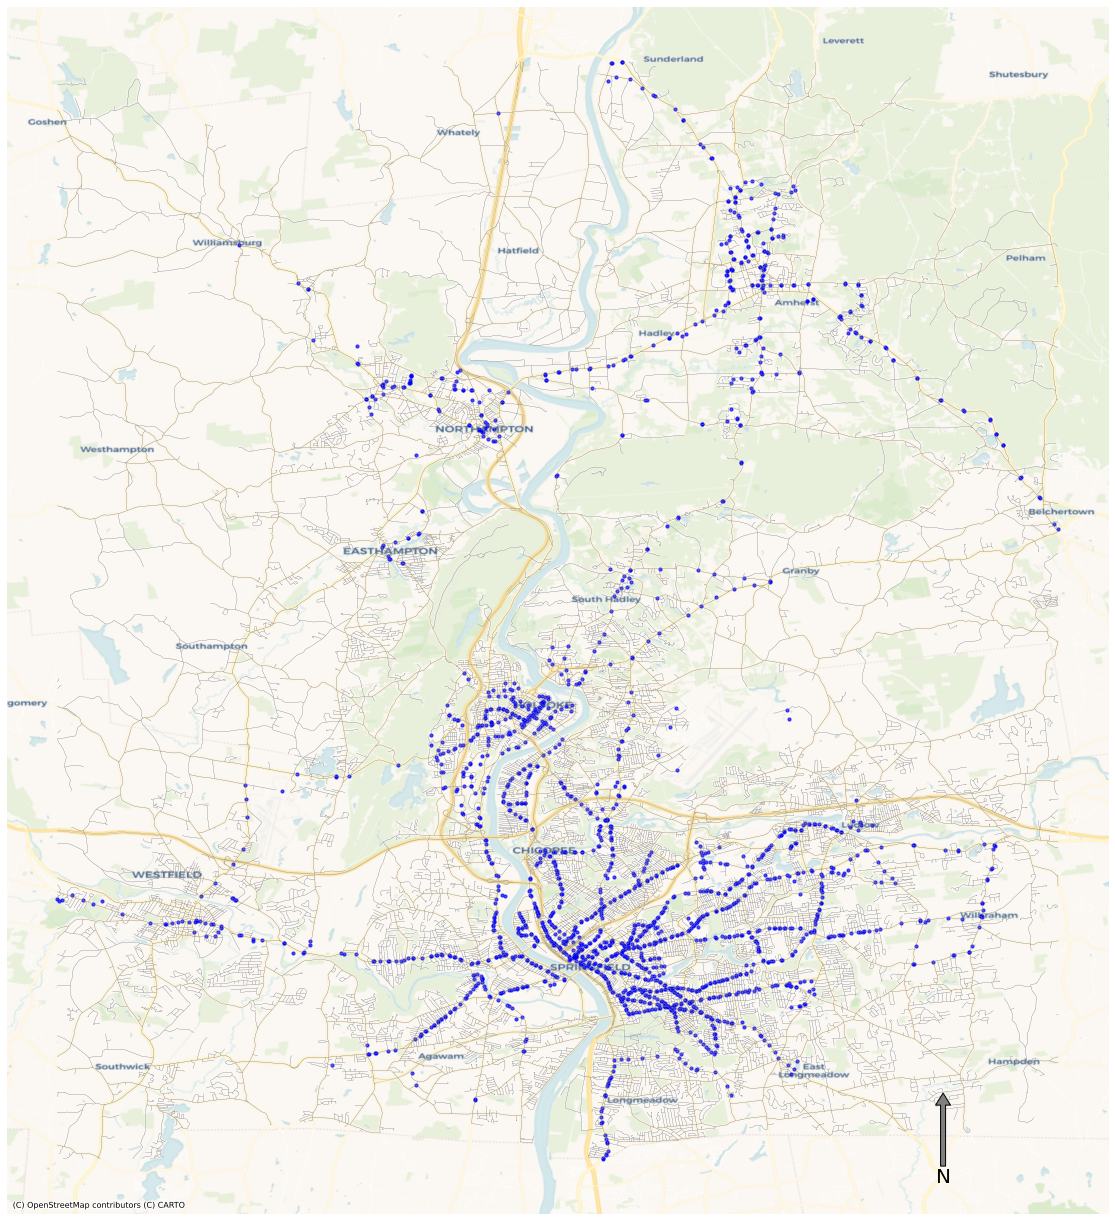

In [130]:
#STREETS
fig, ax = plt.subplots(figsize=(16,20))
#area.plot(ax=ax, facecolor='.9',alpha=.3)
streets_clipped = streets.clip(bus_network_extent)
streets_clipped.plot(ax=ax, linewidth=.2, edgecolor='gray')
bstops.plot(ax=ax, color='blue', alpha=.7, markersize=10)
src = contextily.providers.CartoDB.Voyager
#contextily.add_basemap(ax=ax, source=contextily.providers.CartoDB.Positron,  crs=streets.crs, zoom=11)
contextily.add_basemap(ax=ax, source=src,  crs=streets.crs, zoom=12)
#img, img_ext = contextily.bounds2img(b[0], b[1], b[2], b[3], ll=True,source=src)
plt.tight_layout()
ax.axis('off')
#Add north arrow, https://stackoverflow.com/a/58110049/604456
x, y, arrow_length = 0.85, 0.10, 0.07
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='gray', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

#ax.imshow(img, interpolation='bilinear')#, extent = img_ext)
plt.savefig('../figures/pv-bus-streets.png',dpi=120)

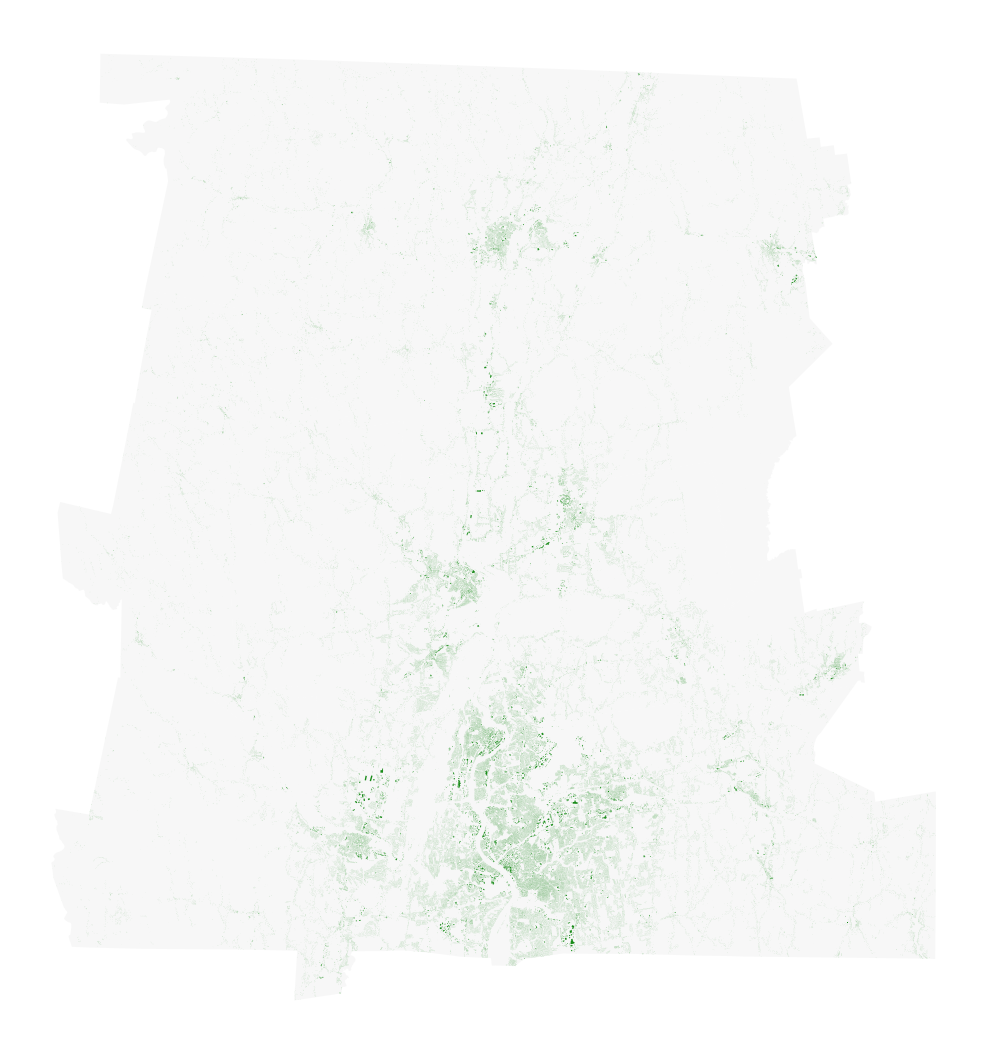

In [288]:
#BLDGS
fig, ax = plt.subplots(figsize=(15,15))
area.plot(ax=ax, facecolor='0.9',alpha=.3)#, edgecolor='k')
blgds_no_nodes = bldgs.iloc[bldgs.index.get_level_values('element_type')!='node']['geometry']
blgds_no_nodes.plot(ax=ax, facecolor='green', alpha=0.9)
plt.tight_layout()
ax.axis('off')
plt.savefig('../figures/pv-buildings.png',dpi=120)